In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [3]:
from plot_utils import *

In [4]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [4]:
from diffusion_utils import *

In [5]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# API

In [5]:
data=load_json('MPS_(0,1)_L10_pctrl0.500_pproj0.000_s334_coherence.json')

In [10]:
data.keys()

dict_keys(['args', 'coh_mat', 'fdw'])

In [18]:
np.array(data['fdw'])[:,-1]

array([4.63129765e-04, 1.32349392e-04, 2.84606937e-04, 1.09943096e-04,
       1.24483042e-03, 1.07222172e-01, 3.68036699e-02, 5.86151819e-01,
       8.92495571e-02, 1.78332495e-01, 4.88909495e-33])

In [9]:
np.array(data['coh_mat']).shape

(11, 11, 201)

In [5]:
params_list=[
# ({'nu':0,'de':1,},{'L':np.arange(10,31,10),'p_ctrl':[0.4,.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(0,20)}),
# ({'nu':0,'de':1,},{'L':np.arange(10,31,10),'p_ctrl':[.5,0.4,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(0,2000)}),
({'nu':0,'de':1,},{'s':np.arange(0,2000),'L':np.arange(10,31,10),'p_ctrl':[.5,0.4,0.59],'p_proj':np.linspace(0.0,0.0,1),}),
# ({'nu':0,'de':1,},{'p_ctrl':np.linspace(0.4,0.6,21),'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(2000),'L':np.arange(20,61,10)}),
# ({'nu':0,'de':1,},{'p_ctrl':[0.4,0.5,0.59],'p_proj':np.linspace(0.0,0.0,1),'s':np.arange(10000),'L':np.arange(20,61,10)}),
]

In [6]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_coherence.json',
        fn_dir_template='./MPS_0-1_coherence_x01',
        input_params_template='{p_ctrl:.3f} {p_proj:.3f} {L} {s}',
        load_data=load_json,
        filename='params_CT_MPS_0_coherence.txt',
        filelist=None,
        load=False,
        data_dict=None,
    )

generate_params:   0%|          | 0/12000 [00:00<?, ?it/s]

generate_params: 100%|██████████| 12000/12000 [00:00<00:00, 41118.65it/s]



In [6]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_s{s}_coherence.json',
        fn_dir_template='./',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        # data_dict_file='xj({nu},{de})_coherence.pickle', 
        # zip_fn='./MPS_0-1_coherence.zip'
        zip_fn='./MPS_0-1_coherence_x01.zip'
    )
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','L','p_ctrl','p_proj','T'])

generate_params:   0%|          | 0/18000 [00:00<?, ?it/s]

generate_params: 100%|██████████| 18000/18000 [06:46<00:00, 44.28it/s]


In [60]:
fns=set(os.listdir('./MPS_0-1_coherence/'))

In [61]:
len(data_MPS_0_T_dict['fn'])

4808

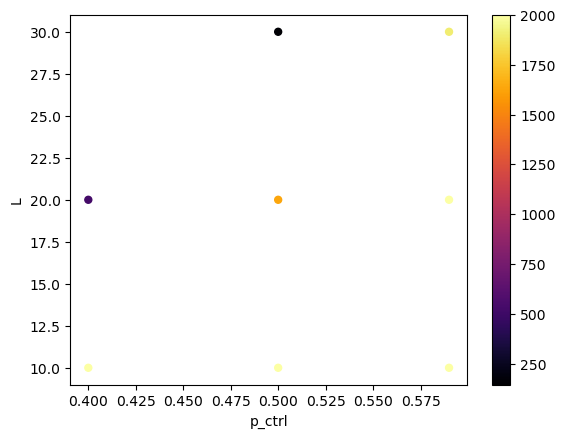

In [7]:
visualize_dataset(df_MPS_0_T,params={'Metrics':'coh_mat','T':0,'p_proj':0},xlabel='p_ctrl',ylabel='L')

In [43]:
p_ctrl=0.4
L=10
intra_=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.diag).tolist())
inter_=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(lambda x:x[0]).tolist())
fdw_=np.stack(df_MPS_0_T.xs(level='Metrics',key='fdw').xs(level='p_ctrl',key=p_ctrl).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).tolist())

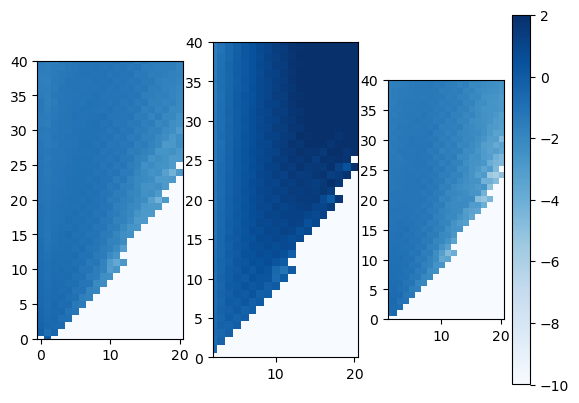

In [44]:
fig,ax=plt.subplots(1,3)
ax[0].imshow(np.log10(fdw_+1e-10),cmap='Blues',vmin=-10,vmax=2)
ax[1].imshow(np.log10(intra_+1e-10),cmap='Blues',vmin=-10,vmax=2)
im=ax[2].imshow(np.log10(inter_+1e-10),cmap='Blues',vmin=-10,vmax=2)

[ax.set_ylim(0,40) for ax in ax]
ax[1].set_xlim(2,None)
ax[2].set_xlim(1,None)

plt.colorbar(im)

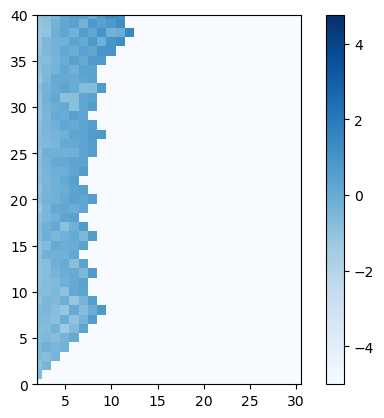

In [14]:
plt.imshow(np.log10(intra_+1e-5),cmap='Blues')
plt.ylim(0,40)
plt.xlim(2,None)
plt.colorbar()

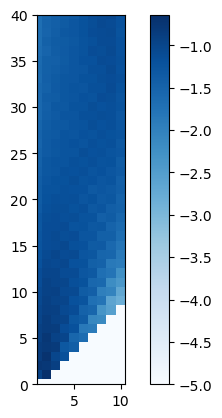

In [20]:
plt.imshow(np.log10(inter_+1e-5),cmap='Blues')
plt.ylim(0,40)
plt.xlim(1,None)
plt.colorbar()

In [45]:
intra_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=30)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.trace).tolist())

In [46]:
total_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=30)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.sum).tolist())

In [97]:
total_sum

array([-1.00000000e+00,  2.91356427e+07,  1.13505246e+08, ...,
        5.81511678e+06,  6.34485467e+06,  5.72471530e+06])

In [47]:
data_list=[]
for L in [10,20]:
    print(L)
    intra_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.trace).tolist())
    total_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.sum).tolist())
    data_list.append((total_sum-intra_sum))
    # data_list.append((total_sum-intra_sum)/total_sum)

10
20


In [48]:
intra_sum[-10:]

array([7961.52950012, 7705.48183543, 7688.59755396, 7527.91266765,
       7690.46731413, 7863.73205012, 7657.34232902, 8104.40830362,
       8200.45355945, 8599.75844877])

In [49]:
total_sum[-10:]

array([21959.9679025 , 21273.70358014, 21165.39002693, 20722.72193389,
       21214.94372481, 21211.78699366, 20768.28389788, 22124.86452058,
       22399.32335391, 23460.12430596])

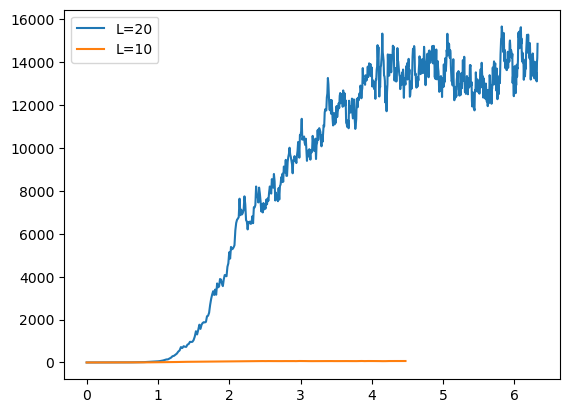

In [50]:
fig,ax=plt.subplots()
z=1
for L,data in zip([20,10],data_list[::-1]):
    # intra_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(lambda x: contract(x,[0,0])).tolist())
    # total_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.sum).tolist())
    # data = (total_sum-intra_sum)/total_sum
    t_list= np.arange(2*L**2+1)
    
    ax.plot(np.sqrt(t_list/L**z),data,label='L={}'.format(L))
ax.legend()
# ax.set_xlim(0,40)

NameError: name 'data_list' is not defined

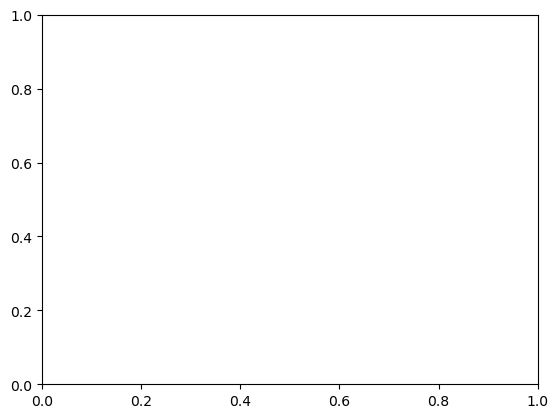

In [10]:
fig,ax=plt.subplots()
z=1
for L,data in zip([30,20,10],data_list[::-1]):
    intra_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(lambda x: contract(x,[0,0])).tolist())
    total_sum=np.stack(df_MPS_0_T.xs(level='Metrics',key='coh_mat').xs(level='p_ctrl',key=0.5).xs(level='p_proj',key=0.00).xs(level='L',key=L)['observations'].apply(lambda x: np.mean(x,axis=0)).apply(np.sum).tolist())
    data = (total_sum-intra_sum)/total_sum
    t_list= np.arange(2*L**2+1)
    
    ax.plot(np.sqrt(t_list/L**z),data,label='L={}'.format(L))
ax.legend()
# ax.set_xlim(0,40)